<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目背景" data-toc-modified-id="项目背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>项目背景</a></span></li><li><span><a href="#理解数据" data-toc-modified-id="理解数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>理解数据</a></span></li><li><span><a href="#导入分析库" data-toc-modified-id="导入分析库-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>导入分析库</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#数据清洗" data-toc-modified-id="数据清洗-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>数据清洗</a></span></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>数据分析</a></span><ul class="toc-item"><li><span><a href="#pv,uv分析" data-toc-modified-id="pv,uv分析-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>pv,uv分析</a></span></li><li><span><a href="#ARPU，ARPPU分析" data-toc-modified-id="ARPU，ARPPU分析-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>ARPU，ARPPU分析</a></span></li><li><span><a href="#人均消费次数分析" data-toc-modified-id="人均消费次数分析-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>人均消费次数分析</a></span></li><li><span><a href="#付费率分析" data-toc-modified-id="付费率分析-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>付费率分析</a></span></li><li><span><a href="#复购率分析" data-toc-modified-id="复购率分析-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>复购率分析</a></span></li><li><span><a href="#漏斗流失分析" data-toc-modified-id="漏斗流失分析-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>漏斗流失分析</a></span></li></ul></li><li><span><a href="#分析结论" data-toc-modified-id="分析结论-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>分析结论</a></span></li></ul></div>

## 项目背景
* 网购已经成为人们生活不可或缺的一部分，本次项目基于淘宝app平台数据通过相关指标对用户行为进行分析，从而探索用户相关行为模式。


## 理解数据
* 字段如下:
* user_id: 用户身份
* item_id:商品ID
* behavior_type：用户行为类型(包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示)
* user_geohash：地理位置
* item_category:品类旧D(商品所属的品类)
* time:用户行为发生的时间

## 导入分析库


In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

In [2]:
#设置图形显示中文避免乱码
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

## 导入数据

In [3]:
user_data = pd.read_csv('tianchi_mobile_recommend_train_user.csv',encoding = 'utf8',dtype=str)#数据字段无实际加减意义故都读成str格式

In [4]:
user_data = user_data.sample(frac = 0.2,replace = False)#由于电脑配置原因抽取数据的20%进行分析

In [5]:
user_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
3588708,60575815,131921232,1,NaN,6512,2014-12-11 10
1931135,11361547,242111474,1,94j70nw,5027,2014-12-01 20
6173016,36953591,362402083,1,94jcjpf,10049,2014-12-13 22
3652328,63489689,171654122,2,NaN,1121,2014-11-27 22
7688390,61948623,92266285,1,mtobc56,7350,2014-11-20 19


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451381 entries, 3588708 to 11381945
Data columns (total 6 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
dtypes: object(6)
memory usage: 130.9+ MB


## 数据清洗

In [7]:
#统计缺失值缺失率
user_data.apply(lambda x : (x.isnull().sum())/len(user_data),axis = 0)

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.680114
item_category    0.000000
time             0.000000
dtype: float64

In [8]:
user_data.apply(lambda x : x.isnull().sum(),axis = 0)

user_id                0
item_id                0
behavior_type          0
user_geohash     1667218
item_category          0
time                   0
dtype: int64

In [9]:
user_data['date'] = user_data['time'].str[0:10]
user_data['hour'] = user_data['time'].str[11:]

In [10]:
user_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
3588708,60575815,131921232,1,NaN,6512,2014-12-11 10,2014-12-11,10
1931135,11361547,242111474,1,94j70nw,5027,2014-12-01 20,2014-12-01,20
6173016,36953591,362402083,1,94jcjpf,10049,2014-12-13 22,2014-12-13,22
3652328,63489689,171654122,2,NaN,1121,2014-11-27 22,2014-11-27,22
7688390,61948623,92266285,1,mtobc56,7350,2014-11-20 19,2014-11-20,19


In [11]:
user_data.describe(include=['object'])

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,2451381,2451381,2451381,784163,2451381,2451381,2451381,2451381
unique,9972,1308755,4,300408,7965,744,31,24
top,36233277,112921337,1,94ek6ke,1863,2014-12-11 22,2014-12-12,22
freq,6116,287,2309909,213,78281,10940,138316,218057


In [12]:
user_data.describe()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,2451381,2451381,2451381,784163,2451381,2451381,2451381,2451381
unique,9972,1308755,4,300408,7965,744,31,24
top,36233277,112921337,1,94ek6ke,1863,2014-12-11 22,2014-12-12,22
freq,6116,287,2309909,213,78281,10940,138316,218057


In [13]:
user_data['hour'].describe()

count     2451381
unique         24
top            22
freq       218057
Name: hour, dtype: object

可以看出无异常值

## 数据分析

### pv,uv分析

In [14]:
# pv：访问量，每天网页浏览量或者点击量，uv:访客量，一般将一个用户当成一个访问量，一个客户当成一个独立访客
pv_daily = user_data.groupby('date').count()['user_id']

In [15]:
user_data.groupby('date').count()

,user_id,item_id,behavior_type,user_geohash,item_category,time,hour
date,,,,,,,
2014-11-18,73100,73100,73100,19846,73100,73100,73100
2014-11-19,71851,71851,71851,20772,71851,71851,71851
2014-11-20,70700,70700,70700,19347,70700,70700,70700
2014-11-21,66641,66641,66641,18111,66641,66641,66641
2014-11-22,72575,72575,72575,20120,72575,72575,72575
2014-11-23,76148,76148,76148,21122,76148,76148,76148
2014-11-24,75884,75884,75884,21654,75884,75884,75884
2014-11-25,74122,74122,74122,19123,74122,74122,74122
2014-11-26,72188,72188,72188,18478,72188,72188,72188


In [16]:
pv_daily.head()#每天网页的访问量

date
2014-11-18    73100
2014-11-19    71851
2014-11-20    70700
2014-11-21    66641
2014-11-22    72575
Name: user_id, dtype: int64

In [17]:
uv_daily = user_data.groupby('date')['user_id'].apply(lambda x : x.drop_duplicates().count())#每天用户的访问量

In [18]:
uv_daily.head()

date
2014-11-18    5628
2014-11-19    5685
2014-11-20    5630
2014-11-21    5514
2014-11-22    5481
Name: user_id, dtype: int64

In [19]:
pv_uv_daily = pd.concat([pv_daily,uv_daily],axis = 1)


In [20]:
pv_uv_daily

,user_id,user_id
date,,
2014-11-18,73100,5628
2014-11-19,71851,5685
2014-11-20,70700,5630
2014-11-21,66641,5514
2014-11-22,72575,5481
2014-11-23,76148,5705
2014-11-24,75884,5774
2014-11-25,74122,5612
2014-11-26,72188,5613


In [21]:
pv_uv_daily.head()

,user_id,user_id
date,,
2014-11-18,73100,5628
2014-11-19,71851,5685
2014-11-20,70700,5630
2014-11-21,66641,5514
2014-11-22,72575,5481


In [22]:
#重命名
# pv_uv_daily.rename(columns={'user_id':'pv','user_id':'uv'},inplace=True)
pv_uv_daily.columns = ['pv','uv']

In [23]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,73100,5628
2014-11-19,71851,5685
2014-11-20,70700,5630
2014-11-21,66641,5514
2014-11-22,72575,5481


In [24]:
#计算相关系数
pv_uv_daily.corr(method='pearson')

,pv,uv
pv,1.000000,0.944041
uv,0.944041,1.000000


In [25]:
pv_uv_daily.corr(method='spearman')

,pv,uv
pv,1.00000,0.83698
uv,0.83698,1.00000


可以看出访问量和访问用户数成正相关，相关性较强

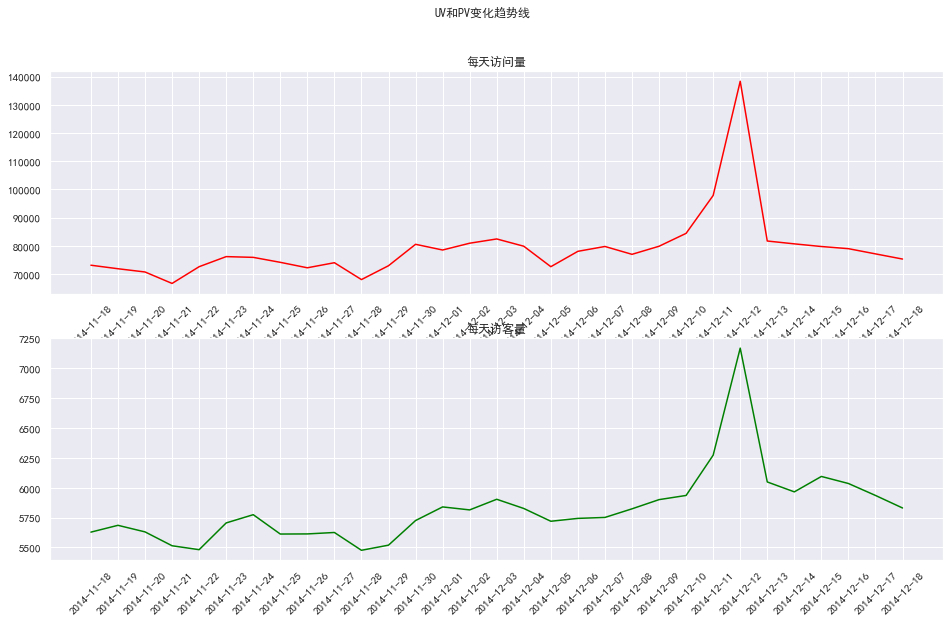

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(pv_daily,color='red')
plt.title('每天访问量')
plt.xticks(rotation=45)
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天访客量')
plt.suptitle('UV和PV变化趋势线')
plt.xticks(rotation=45)
plt.show()

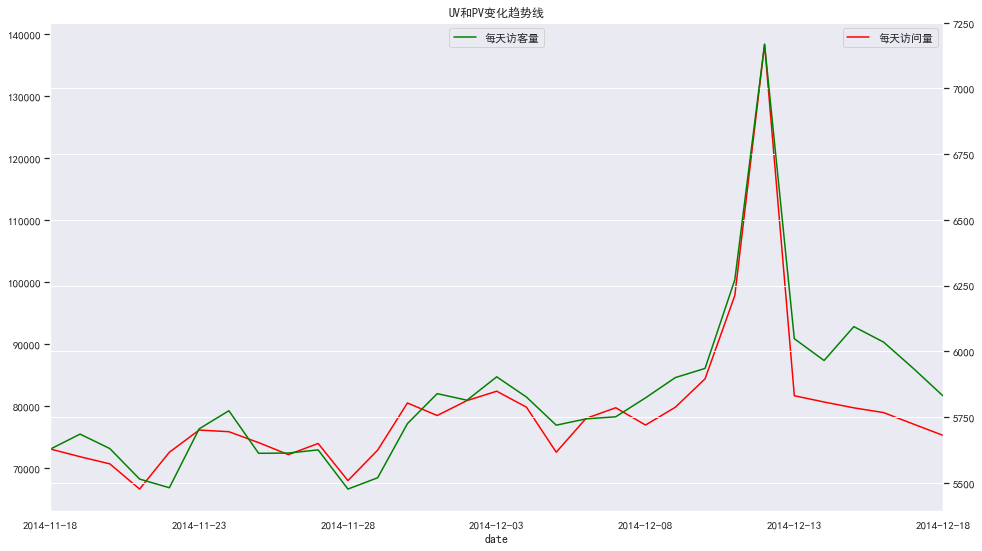

In [27]:
plt.figure(figsize=(16,9))
pv_uv_daily['pv'].plot(label = '每天访问量',color = 'red')
plt.legend(loc='upper right')
pv_uv_daily['uv'].plot(label = '每天访客量',color = 'green',secondary_y=True)
plt.title('UV和PV变化趋势线')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.show()

可以看出pv和uv差距比较大，都在双十二当天达到峰值

In [28]:
#对小时访问量进行分析
pv_daiily_hour  = user_data.groupby('hour').count()['user_id']

In [29]:
pv_daiily_hour

hour
00    103496
01     53789
02     29256
03     19524
04     16055
05     17704
06     31693
07     57435
08     79192
09     96790
10    110606
11    105614
12    106927
13    120100
14    119551
15    120020
16    115070
17    101017
18    109042
19    147457
20    186478
21    217254
22    218057
23    169254
Name: user_id, dtype: int64

In [30]:
uv_daiily_hour  = user_data.groupby('hour')['user_id'].apply(lambda x : x.drop_duplicates().count())

In [31]:
uv_daiily_hour.head()

hour
00    5237
01    3344
02    2176
03    1635
04    1471
Name: user_id, dtype: int64

In [32]:
pv_uv_hour = pd.concat([pv_daiily_hour,uv_daiily_hour],axis = 1)

In [33]:
pv_uv_hour.head()

,user_id,user_id
hour,,
00,103496,5237
01,53789,3344
02,29256,2176
03,19524,1635
04,16055,1471


In [34]:
# pv_uv_hour.rename(columns={'user_id':'pv','user_id':'uv'},inplace=True)
pv_uv_hour.columns = ['pv','uv']


In [35]:
pv_uv_hour.head()

,pv,uv
hour,,
00,103496,5237
01,53789,3344
02,29256,2176
03,19524,1635
04,16055,1471


In [36]:
#计算相关性
pv_uv_hour.corr(method='pearson')

,pv,uv
pv,1.000000,0.863731
uv,0.863731,1.000000


In [37]:
pv_uv_hour.corr(method='spearman')

,pv,uv
pv,1.000000,0.913913
uv,0.913913,1.000000


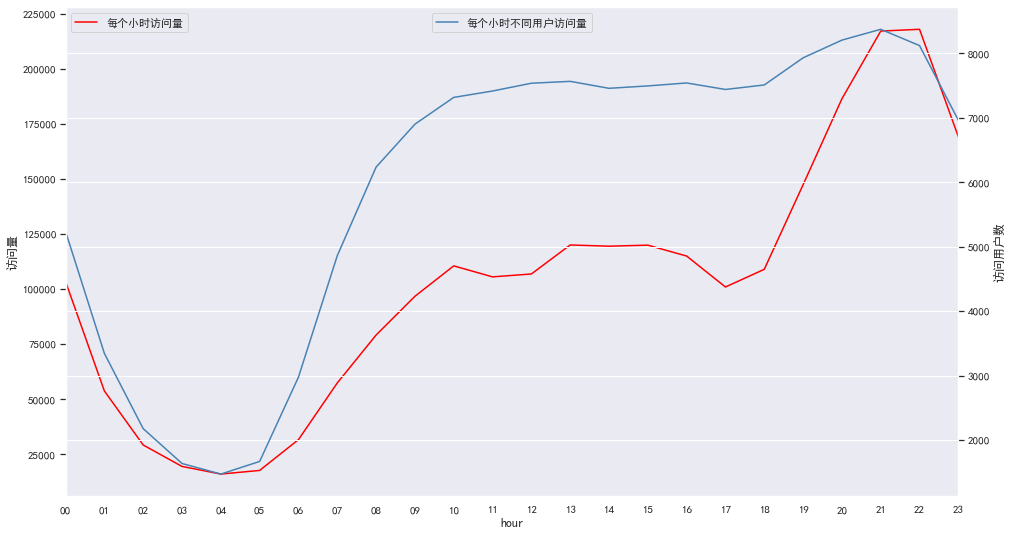

In [38]:
#绘图
plt.figure(figsize=(16,9))
# plt.subplot(211)
pv_uv_hour['pv'].plot(color='red',label='每个小时访问量')
plt.ylabel('访问量')
plt.legend(loc = 'upper left')
# plt.title('每天访问量')
pv_uv_hour['uv'].plot(color = 'steelblue',label = '每个小时不同用户访问量',secondary_y = True)
plt.ylabel('访问用户数')
plt.legend(loc = 'upper center')
plt.xticks(range(0,24),pv_uv_hour.index)



# plt.xticks(rotation=45)
# plt.subplot(212)
# plt.plot(uv_daily,color='green')
# plt.title('每天访客量')
# plt.suptitle('UV和PV变化趋势线')
# plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

In [39]:
# plt.figure(figsize=(16,9))
# # plt.yticks(secondary_y = True)
# plt.ylabel('访问量')
# sns.lineplot(data = pv_uv_hour)

可以看出，pv和uv在凌晨0到5点都呈现下降趋势，在晚间8点到22点用户访问达到峰值

In [40]:
#不同行为用户，pv,uv分析，使用透视图
pv_detail  = pd.pivot_table(columns='behavior_type',index = 'hour',data = user_data,values = 'user_id',aggfunc=np.size)

In [41]:
pv_detail#不同行为每个小时访问量

behavior_type,1,2,3,4
hour,,,,
00,97460,2243,2828,965
01,50794,1349,1336,310
02,27679,652,770,155
03,18472,460,491,101
04,15079,428,479,69
05,16760,412,452,80
06,29949,766,792,186
07,54466,1133,1448,388
08,74951,1544,1994,703


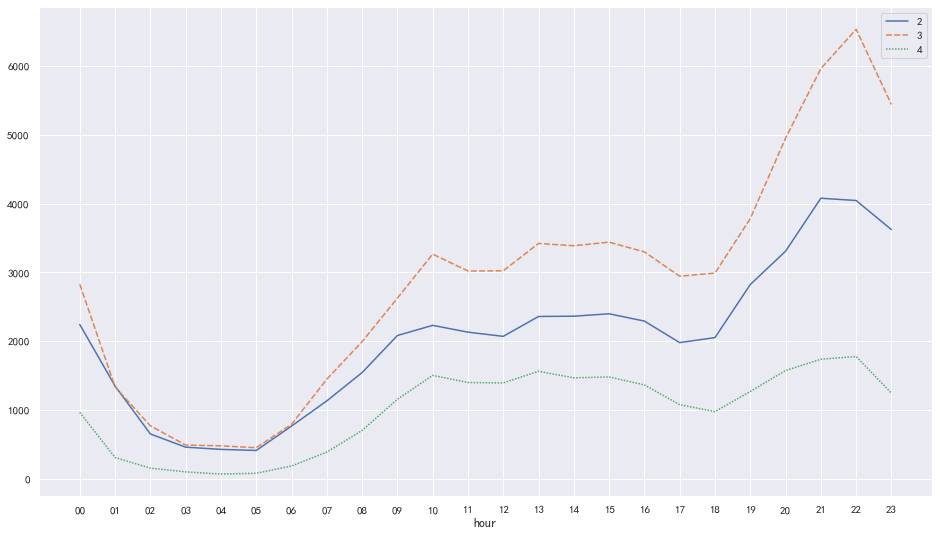

In [42]:
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail.iloc[:,1:])#查看2,3,4
plt.show()

可以看出，点击的访问量最多，加购物车量超过点击收藏量，购买的量最少

### ARPU，ARPPU分析

In [43]:
#分析支付的用户
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451381 entries, 3588708 to 11381945
Data columns (total 8 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtypes: object(8)
memory usage: 168.3+ MB


In [44]:
user_buy = user_data[user_data['behavior_type'] == '4'].groupby('user_id')['behavior_type'].count()

In [45]:
user_buy.head()#每个用户下单的数量

user_id
100001878    7
100011562    1
100012968    3
100014060    5
100024529    6
Name: behavior_type, dtype: int64

In [46]:
user_buy.describe()

count    6631.000000
mean        3.611672
std         4.477580
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       155.000000
Name: behavior_type, dtype: float64

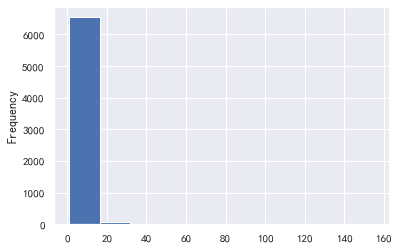

In [47]:
user_buy.plot(kind = 'hist')
plt.show()

In [48]:
#日ARPPU ：从每位付费用户身上获得的收入，反映每个付费用户的平均付费额度，计算=总收入/活跃用户付费数量，没有消费金额用消费次数代替
user_buy_all = user_data[user_data['behavior_type'] == '4'].groupby(['user_id','date']).count()['behavior_type']


In [49]:
user_buy_all = user_buy_all.reset_index().rename(columns = {'behavior_type':'total'})

In [50]:
user_buy_all.head()

,user_id,date,total
0,100001878,2014-11-18,1
1,100001878,2014-11-24,2
2,100001878,2014-11-26,1
3,100001878,2014-12-04,1
4,100001878,2014-12-08,1
5,100001878,2014-12-15,1
6,100011562,2014-12-12,1
7,100012968,2014-11-26,1
8,100012968,2014-11-28,1
9,100012968,2014-12-03,1


In [51]:
user_buy_all1 = user_buy_all.groupby('date').sum()['total']/user_buy_all.groupby('date').count()['total']

In [89]:
user_buy_all1.des

date
2014-11-18    1.416514
2014-11-19    1.443983
2014-11-20    1.396761
2014-11-21    1.337079
2014-11-22    1.389583
2014-11-23    1.346311
2014-11-24    1.365462
2014-11-25    1.356164
2014-11-26    1.450098
2014-11-27    1.393053
2014-11-28    1.265979
2014-11-29    1.382096
2014-11-30    1.411647
2014-12-01    1.439338
2014-12-02    1.348968
2014-12-03    1.354783
2014-12-04    1.401070
2014-12-05    1.355513
2014-12-06    1.415984
2014-12-07    1.349794
2014-12-08    1.356190
2014-12-09    1.377119
2014-12-10    1.345339
2014-12-11    1.353066
2014-12-12    1.721679
2014-12-13    1.354086
2014-12-14    1.418000
2014-12-15    1.318841
2014-12-16    1.355072
2014-12-17    1.349146
2014-12-18    1.364706
Name: total, dtype: float64

### 人均消费次数分析

In [52]:
user_buy_all1#每天的人均消费次数

date
2014-11-18    1.416514
2014-11-19    1.443983
2014-11-20    1.396761
2014-11-21    1.337079
2014-11-22    1.389583
2014-11-23    1.346311
2014-11-24    1.365462
2014-11-25    1.356164
2014-11-26    1.450098
2014-11-27    1.393053
2014-11-28    1.265979
2014-11-29    1.382096
2014-11-30    1.411647
2014-12-01    1.439338
2014-12-02    1.348968
2014-12-03    1.354783
2014-12-04    1.401070
2014-12-05    1.355513
2014-12-06    1.415984
2014-12-07    1.349794
2014-12-08    1.356190
2014-12-09    1.377119
2014-12-10    1.345339
2014-12-11    1.353066
2014-12-12    1.721679
2014-12-13    1.354086
2014-12-14    1.418000
2014-12-15    1.318841
2014-12-16    1.355072
2014-12-17    1.349146
2014-12-18    1.364706
Name: total, dtype: float64

In [90]:
user_buy_all1.mean()

1.3849491586697933

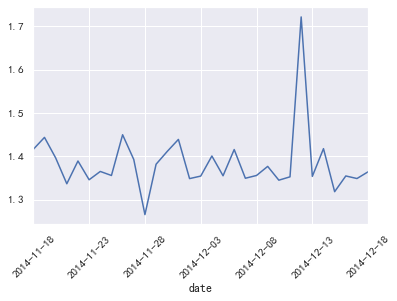

In [53]:
user_buy_all1.plot(kind = 'line')
plt.xticks(rotation=45)
plt.show()

In [54]:
#日ARPU情况平均每用户收入可通过总收入除以AU计算得到，可以衡量产品的盈利能力和发展能力，用活跃用户数平均消费次数等于用户总次数除以活跃用户数
user_data['operation'] = 1#为了计数求用户的访问次数
user_buy_all2 = user_data.groupby(['date','user_id','behavior_type'])['operation']

In [55]:
user_buy_all2  = user_buy_all2.count().reset_index().rename(columns = {'operation':'total'})

In [56]:
user_buy_all2.head()

,date,user_id,behavior_type,total
0,2014-11-18,100001878,1,23
1,2014-11-18,100001878,4,1
2,2014-11-18,100014060,1,3
3,2014-11-18,100014060,3,1
4,2014-11-18,100014060,4,1


In [92]:
user_buy_all2.groupby('date').apply(lambda x : x[x['behavior_type'] == '4']['total'].sum()/len(x.user_id.unique()))

date
2014-11-18    0.137171
2014-11-19    0.122427
2014-11-20    0.122558
2014-11-21    0.107907
2014-11-22    0.121693
2014-11-23    0.115162
2014-11-24    0.117769
2014-11-25    0.123485
2014-11-26    0.132015
2014-11-27    0.135467
2014-11-28    0.112126
2014-11-29    0.114695
2014-11-30    0.122795
2014-12-01    0.134098
2014-12-02    0.123667
2014-12-03    0.131967
2014-12-04    0.134912
2014-12-05    0.124672
2014-12-06    0.120320
2014-12-07    0.114067
2014-12-08    0.122274
2014-12-09    0.110169
2014-12-10    0.106992
2014-12-11    0.102041
2014-12-12    0.417690
2014-12-13    0.115079
2014-12-14    0.118860
2014-12-15    0.119462
2014-12-16    0.123944
2014-12-17    0.119798
2014-12-18    0.119383
dtype: float64

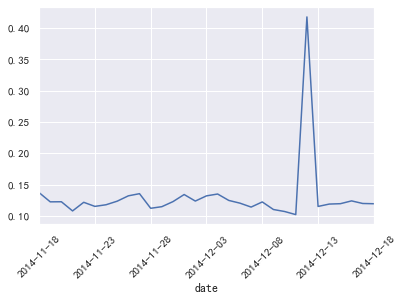

In [57]:
user_buy_all2.groupby('date').apply(lambda x : x[x['behavior_type'] == '4']['total'].sum()/len(x.user_id.unique())).plot()
plt.xticks(rotation=45)
plt.show()

### 付费率分析

In [58]:
#付费率：消费用户人数/活跃用户人数
df = user_buy_all2.groupby('date').apply(lambda x : x[x['behavior_type'] == '4']['total'].count()/len(x.user_id.unique()))

In [94]:
df.mean()

0.09297249239359678

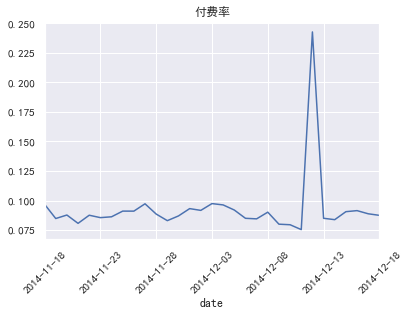

In [59]:
df.plot()
plt.xticks(rotation=45)

plt.title('付费率')
plt.show()

In [60]:
user_buy_all3 = user_data[user_data['behavior_type'] == '4'].groupby(['user_id','date','hour'])['operation'].sum()

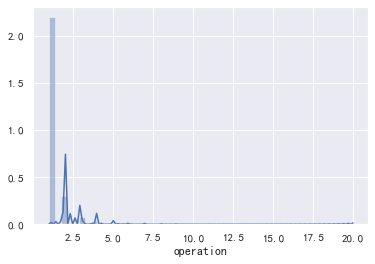

In [61]:
sns.distplot(user_buy_all3)
plt.show()

### 复购率分析

In [62]:
#复购率分析
data_rebuy = user_data[user_data['behavior_type'] == '4'].groupby('user_id')['date']

In [63]:
data_rebuy = data_rebuy.apply(lambda x : len(x.unique()))

In [64]:
#复购率 = 又复购行为的用户数/整个总数（某一天）
data_rebuy[data_rebuy >= 2].count()/data_rebuy.count()

0.6190619816015684

复购率为62.91%左右

In [65]:
user_data['date1'] = pd.to_datetime(user_data['date'],errors='coerce')
data_day_rebuy = user_data[user_data.behavior_type == '4'].groupby('user_id').date1.apply(lambda x : x.sort_values().diff(1).dropna())

In [66]:
data_day_rebuy.map(lambda x :x.days)

user_id            
100001878  3947784      6
           9233732      0
           3198967      2
           7415635      8
           901862       4
           3948408      7
100012968  6781096      2
           4524105      5
100014060  1196129      2
           6324440      7
           5562308     11
           3909748      8
100024529  3072390      0
           673618       0
           7953619      7
           4182326      5
           9587380     16
100027681  7299272      0
           2993009      1
           8686990      1
           5141929      1
           2992889      4
           2992697      4
           12057386     9
10004287   3551210      0
           3967006      3
           2168009      0
100067745  3722703      8
           5684212      1
           5684485      4
                       ..
99796276   764959       3
           10472118     1
           2540444      1
           8949348      1
           764882       0
           765071       0
           5480793

In [67]:
# pd.to_datetime?

### 漏斗流失分析

In [68]:
# 漏斗流失分析

In [69]:
data_user_count  = user_data.groupby('behavior_type').size()

In [70]:
data_user_count

behavior_type
1    2309909
2      48834
3      68689
4      23949
dtype: int64

In [71]:
pv_all = user_data['user_id'].count()

In [95]:
pv_all

2451381

In [72]:
(pv_all - data_user_count[0])/pv_all

0.0577111432290615

In [73]:
(data_user_count[0] - data_user_count[2]) / data_user_count[0]

0.9702633307199547

In [74]:
#从加入购物车到收藏
(data_user_count[2] - data_user_count[1]) / data_user_count[2]

0.28905647192418

In [75]:
#从收藏到购买的流失率
(data_user_count[1] - data_user_count[3]) / data_user_count[1]

0.5095834869148544

In [76]:
#需要重视每个环节的流失率

## 分析结论


1. 根据pv，uv在一个时间段的变化趋势图可知日访问量和访问用户数成正相关，相关性较强，都在双十二当天达到峰值；
2. pv和uv在凌晨0-5点都呈现下降趋势，在晚间8点到10点用户访问达到高峰；
3. 不同行为每小时访问量：点击的访问量最多，加购物车量超过点击收藏量，购买的量最少；
4. 每日人均消费次数：人均消费1.4次，其中在双十二当天最多；
5. 每日的复购率在62.91%左右，平均付费率为9.29%左右；
6. 用户从点击到加购流失率为97%左右，从加购到收藏流失率为28%左右，从收藏到购买的流失率为51%左右；
7. 需要重视每个环节的流失率。